# **Introduction: Predicting Football Plays**
In the following Jupyter Notebook we will be visualizing a dataset and applying 3 different machine learning models to the dataset.

We will use a K-Nearest Neighbors model, a Neural Network model and a Decision Tree Model. These models are going to be trained to learn how to use pre-snap information to predict if the upcoming snap is going to be a pass or a rush.

The dataset we are using is a play by play csv file of plays from games through the years 2013 to 2021 of the National Football League. There are a total of 9 datasets that I have combined into a single large dataset. These datasets can be found [here.](http://nflsavant.com/about.php) There is no need to download these datasets and combine them, as I have already provided the formatted dataset in the zip folder that this notebook came in.

These datasets contain 45 different features. Not all of these can be considered pre-snap information. After cleaning and formatting the datasets, there are a total of 9 different pre-snap features that we will use to predict whether the play is going to be a pass or a rush. The features include; What quarter the game is currently in, the minutes and seconds left on the clock, the down of the play, the number of yards left to get a first down, the yardline of the line of scrimmage, if this down is the series first down, the formation of the offense (4 options), and the yard line direction. 

**Goal:**

The goal of the models that are going to be created and train in this data set are to predict if the next play is a passing or rushing play. In football, every play has tells as to if that specific play is going to be a pass or a run. Every scenerio has its own factors as to what play is best suited for the situation at hand. For instance, say it is 3rd down with 1 yard to go in the 3rd quarter with 5 minutes left in the quarter. From a coaches standpoint the most effective way to get a first down is to hand the ball off to your running back who can easily pick up 1+ yards with a rushing play. Compare this to a scenerio where it is the 4th quarter, 1 minute and 37 seconds are left in the game and you are down by 6, with 0 timeouts left. The most obvious choice for the rest of the game is to throw sideline passes to gain yards and stop the clock after every play. I am hoping to train a model that will be able to think like a coach and predict the play type. The model is only as good as the data, so here we are limited to 9 features and only 2 effective labels/classes.


#**Limitations:** 

  - Lack of Descriptive Features: It would be very beneficial if the dataset had more features that helped describe the picture of the play. For example:
      - Number of Wide Receivers on the field.
      - Number of Running Backs on the field.
      - Number of Tight Ends on the field.
      - Number of Offensive Lineman on the field.

  The above features are interlinked. In football different combinations of these 4 types of positions are very strong factors as to whether the play is going to be a pass or a run
    - Score of game / point differential.
    - Number of timeouts left.

  This paired with the time left in the quarter or game can give strong indications of the likelyhood of a certain play. For instance, if a team is down by 6 points with less than 2 minutes left in the game, they are more likely to pass the ball than run it. This is because they need to travel longer distances down the field and either run out of bounds easily or have an incomplete pass so that the clock stops running after each play giving them more time to run more plays.


We now know a little bit about our dataset, we better understand our limitations, and we have a goal in mind. Let us get our dataset together in the correct format and visualize the data.







# Formatting the Data
Here is where we will format our data into a proper X,y dataset that we can directly feed into our machine learning models.

Our first step, is reading our data into a pandas dataframe and then getting rid of rows where the play type is neither a pass nor a rush. We also need to get rid of any rows where the formation column is empty or not one of the 4 options listed above.

The next step is splitting the data into the appropriate X,y data sets. This separates our features from our labels. Our labels are going to be the play type; 1 indicates a pass play while a 0 represents a rush/run play. Our labels are going to be the 9 other columns in the dataframe.

In [1]:
import pandas as pd
import numpy as np
# step 1, clean data of non useful data
df = pd.read_csv("PBPFormatted.csv")
df1 = df[["Quarter","Minute", "Second", "Down", "ToGo", "YardLine", "SeriesFirstDown", "Formation(0=shotgun, 1=nohuddleShotgun, 2=undercenter,3=noHuddle)", "YardLineDirection(1=OPP,0=OWN)", "PlayType(1=pass, 0=rush)" ]]
df1 = df1[df1["Formation(0=shotgun, 1=nohuddleShotgun, 2=undercenter,3=noHuddle)"] != 4]
df1 = df1[df1["PlayType(1=pass, 0=rush)"] != 2]
# step 2, split data into X,y data sets
y = df1[["PlayType(1=pass, 0=rush)"]]
X = df1[["Quarter","Minute", "Second", "Down", "ToGo", "YardLine", "SeriesFirstDown", "Formation(0=shotgun, 1=nohuddleShotgun, 2=undercenter,3=noHuddle)", "YardLineDirection(1=OPP,0=OWN)"]]
X


,Quarter,Minute,Second,Down,ToGo,YardLine,SeriesFirstDown,"Formation(0=shotgun, 1=nohuddleShotgun, 2=undercenter,3=noHuddle)","YardLineDirection(1=OPP,0=OWN)"
1,2,9,3,3,19,73,0,0,1
2,3,1,17,3,9,67,0,0,1
3,3,1,12,1,10,82,0,2,1
4,3,1,6,1,1,99,0,2,1
5,2,13,48,2,6,53,1,1,1
...,...,...,...,...,...,...,...,...,...
393897,4,10,28,2,4,96,1,0,1
393900,4,5,45,1,10,20,0,0,0
393901,4,5,25,2,3,27,0,1,0
393902,4,4,56,3,9,21,0,1,0


In [2]:
y

,"PlayType(1=pass, 0=rush)"
1,0
2,1
3,1
4,0
5,1
...,...
393897,1
393900,1
393901,0
393902,1


Now that our data is in the proper X,y splits, we need to make sure that our data is in the correct format that our models can read and learn from.

This involves getting rid of the column header names and converting them to numpy arrays for ease of use and for added features thanks to numpy.


In [3]:
X = np.array(X.values)
y = np.array([i[0] for i in y.values])
print(X)
print(y)
print(X.shape, y.shape)

[[ 2  9  3 ...  0  0  1]
 [ 3  1 17 ...  0  0  1]
 [ 3  1 12 ...  0  2  1]
 ...
 [ 4  5 25 ...  0  1  0]
 [ 4  4 56 ...  0  1  0]
 [ 4  4 14 ...  0  1  0]]
[0 1 1 ... 0 1 1]
(270298, 9) (270298,)


# Visualizing the Data

Before training a machine learning model you should always visualize your data to see if it tells a story or gives you clues as to what model you should use or how to improve upon a model. Data visualization is very helpful when it comes to feature selection and potentially increasing the models accuracy

Here we are going to visualize the data in several different ways.

You have already seen what the dataset itself looks like, so lets see what the correlations are using pandas' correlation method.

We want to focus on the features correlated with play type only. This is because we are trying to predict play type and we want to know what features will be most important to predicting this.

In [4]:
df1.corr()['PlayType(1=pass, 0=rush)']

Quarter                                                              0.029932
Minute                                                              -0.084549
Second                                                              -0.004465
Down                                                                 0.225380
ToGo                                                                 0.099004
YardLine                                                            -0.027703
SeriesFirstDown                                                      0.121335
Formation(0=shotgun, 1=nohuddleShotgun, 2=undercenter,3=noHuddle)   -0.409562
YardLineDirection(1=OPP,0=OWN)                                      -0.021687
PlayType(1=pass, 0=rush)                                             1.000000
Name: PlayType(1=pass, 0=rush), dtype: float64

Here we see that 'Formation' has the highest correlation with play type, which is not surprising because it is the only feature that gives us any slight visual indication of what the offense looks like. Even with it being the highest correlation of the features we have, it is still considered a weak correlation. 'Series First Down', 'Down', and 'Minute' have the next highest correlations, these can be helpful in feature selection and improving efficiency.

Lets plot the data and visualize it this way. We are going to be using seaborn's pairplot to help us with this. This is a great tool to use for classification because it can allow us to see if any of the features and their corresponding classes are linear separable.

The following code is commented out because it can take anywhere from 10 - 30 minutes to run, so I saved the photo to save time.


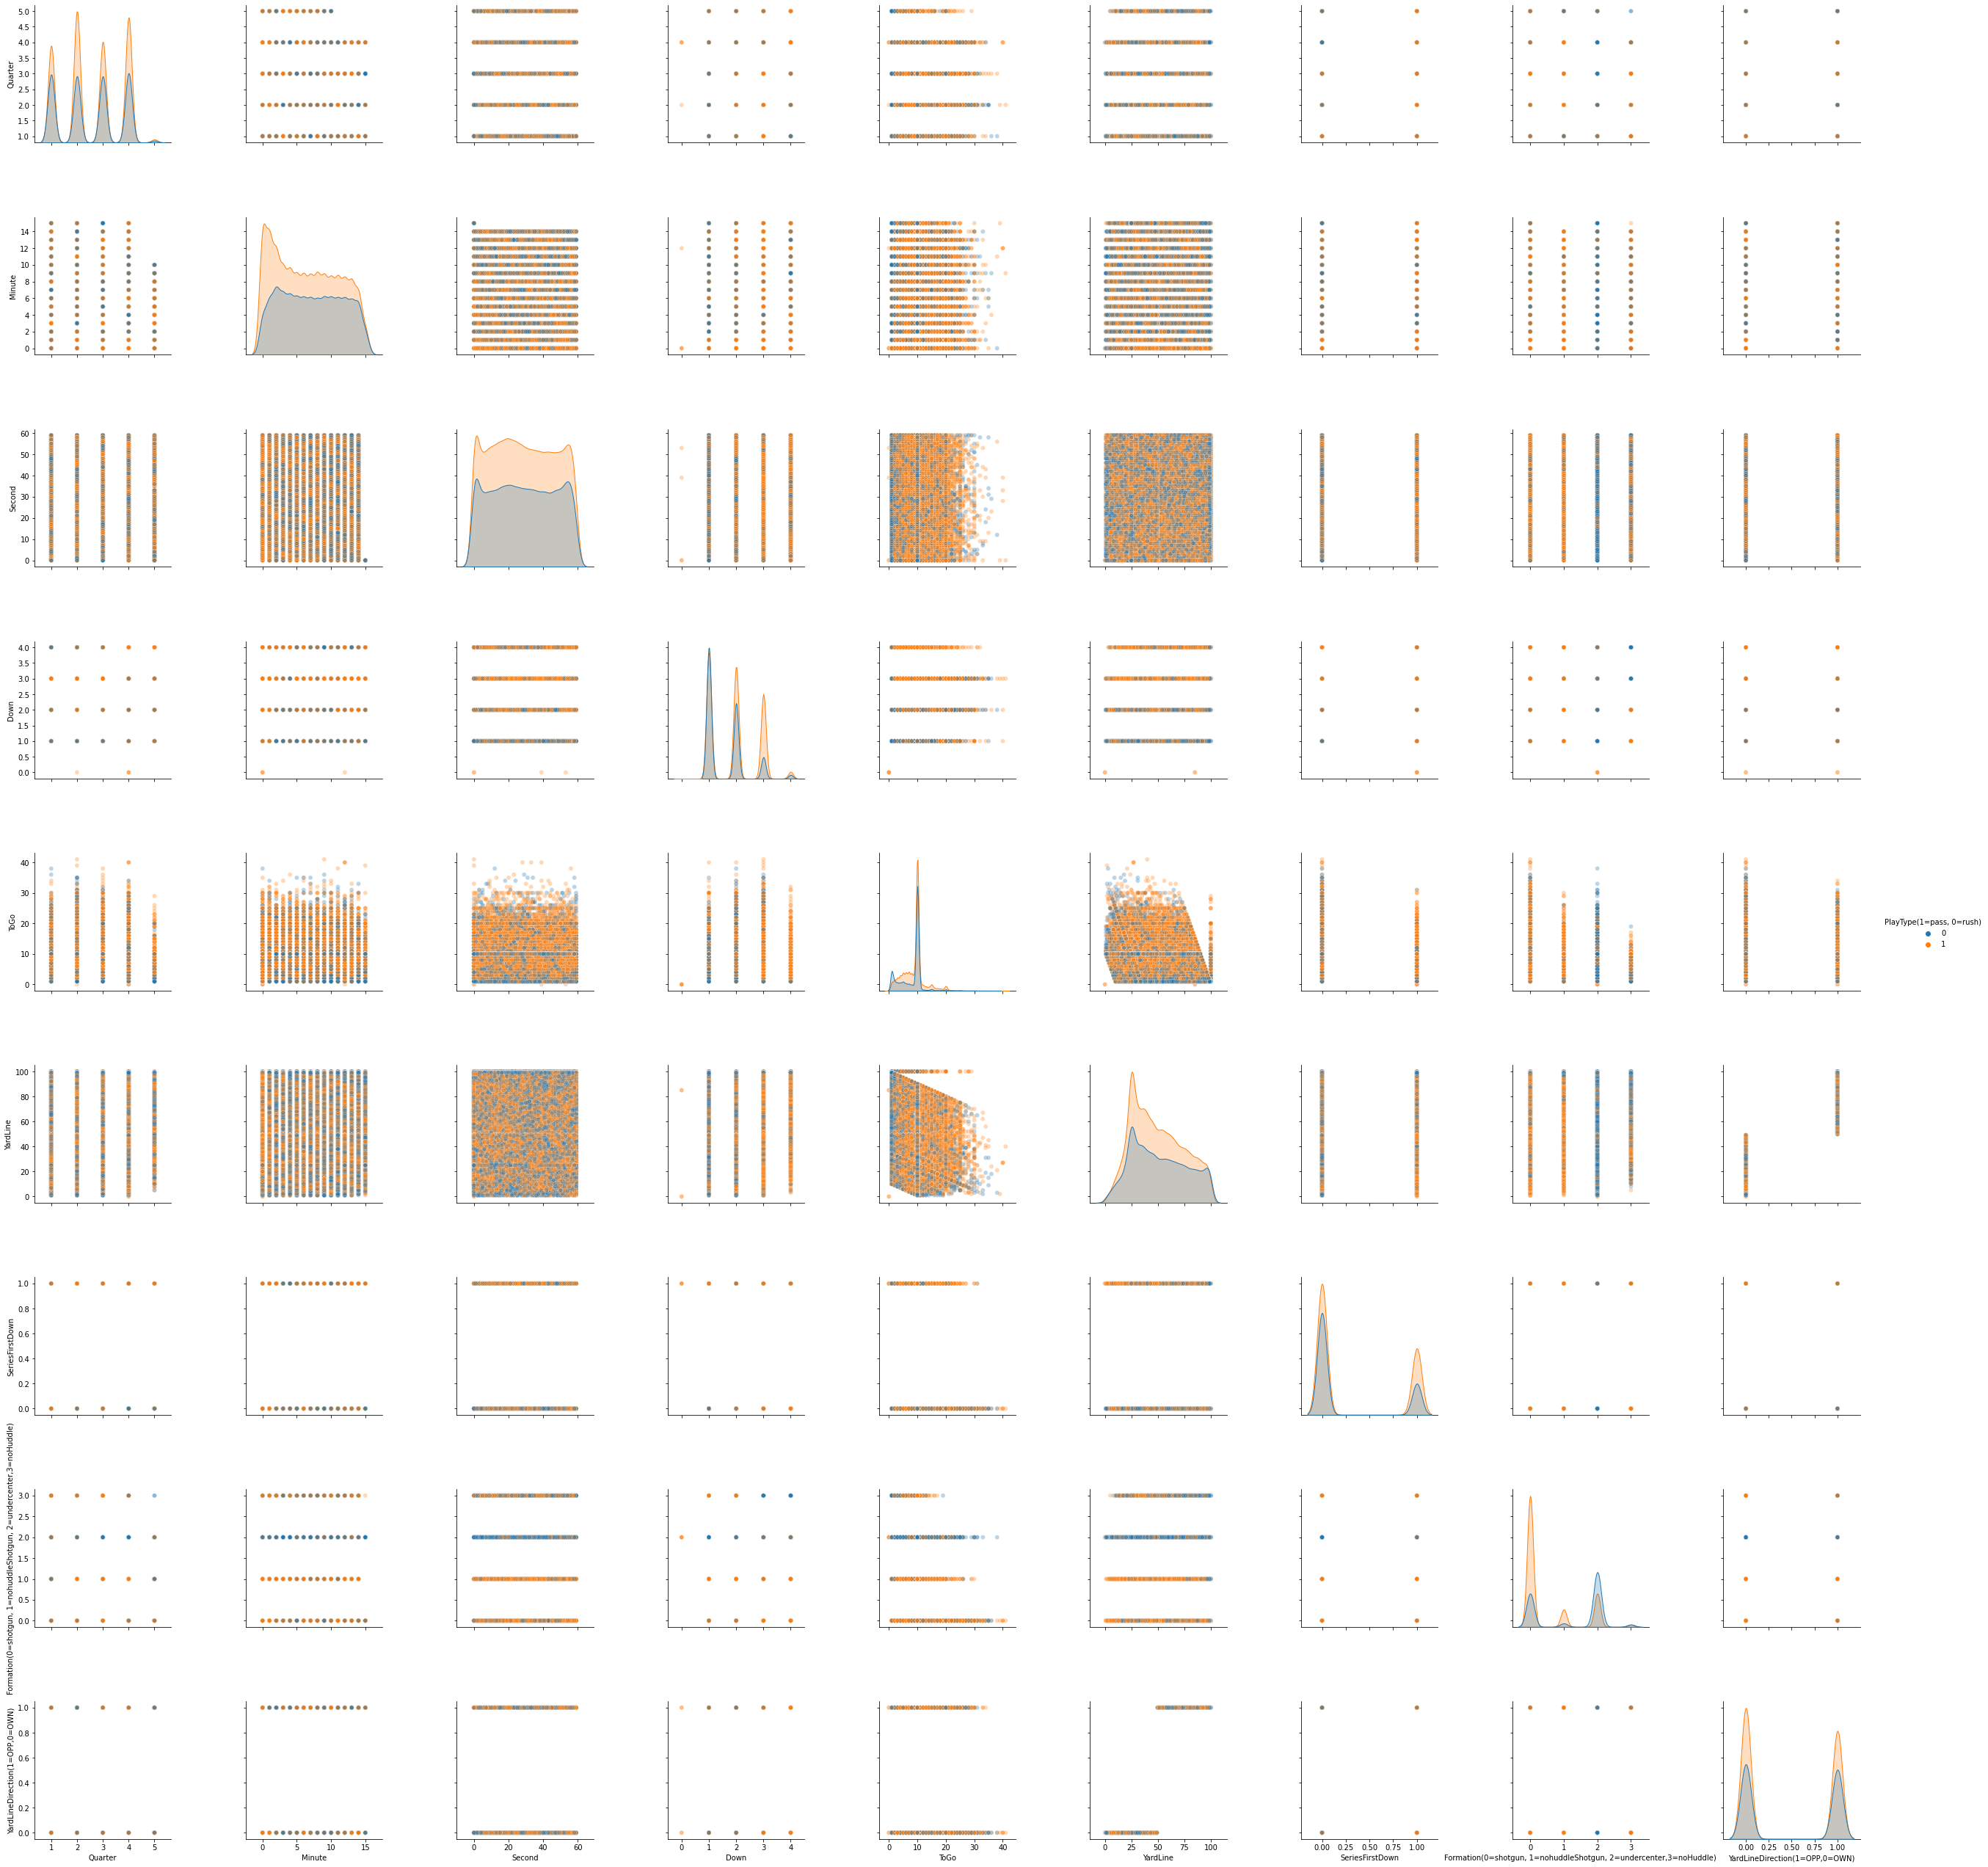

In [5]:
'''import seaborn as sns
fb_pal = sns.color_palette("tab10",2)
sns.pairplot(df1, hue='PlayType(1=pass, 0=rush)', height=4, palette=fb_pal, plot_kws={'alpha': 0.3})'''
from IPython.display import Image, display
display(Image('pairplotAlpha.png'))


As you can see from the pair plot, none of the features and there corresponding classes can be serparated linearly. However, this does not mean that our data set is useless. If you look at certain sections you can see where play types are dominating and this gives us insight to the story that the data is telling us. If you take a look at the pair plot between 'Formation' and 'Down' you can tell that Pass dominates when the formation is a 'no huddle shotgun'. Two of the dots have a slight tint to them from the blue but overwhelmingly the play type, pass, is the correct choice. There are other hidden stories inside the data. Inspect the 'ToGo' and 'Down' pair plot. If you analyze it, and correctly pay attention to the comparions between the down and the yards to go, you can start to see a trend. As the yards to go increase, and the downs go from one to four you can see that the number of and likelyhood of the playtype being 'pass' increases. Our job in this notebook is to train models to learn and see these stories and then predict on them. That is our mission.

We should focus on machine learning models that do not need linear separatability to be very accurate. We will focus on a K-Nearest-Neighbors model and a Neural Network to predict the play type for this data set. We will also experiment with decision trees because of their resemblence to coach/player thinking.

# K Nearest Neighbors

Here we are going to build 2 KNN Classifiers. The first model is going to use every feature we have in the data set. The next model is going to be hand picked features that have the strongest correlation to the play type.

To get the data sets ready for the models we need to create 2 different sets of training and testing sets, one for each model.


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# These will be for model 1
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, test_size=0.40, random_state=69)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(162178, 9) (162178,)
(108120, 9) (108120,)


We are choosing Minute, Down, ToGo, SeriesFirstDown, and Formation for model 2 because they had the highest corelations to the play type.

In [8]:
# These will be for model 2
X2 = df1[["Minute", "Down", "ToGo", "SeriesFirstDown", "Formation(0=shotgun, 1=nohuddleShotgun, 2=undercenter,3=noHuddle)"]]
X2 = np.array(X2.values)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, shuffle=True, stratify=y, test_size=0.35, random_state=69)
print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)

(175693, 5) (175693,)
(94605, 5) (94605,)


This dataset has thousands of instances, so a naive KNN algorithm would take far too long. For this reason, we are going to utilize the [faiss](https://engineering.fb.com/2017/03/29/data-infrastructure/faiss-a-library-for-efficient-similarity-search/) library and a object class written by Jakub Adamczyk from [here](https://gist.github.com/j-adamczyk/74ee808ffd53cd8545a49f185a908584#file-knn_with_faiss-py).

For the faiss library you needed to make sure it is installed. Run the next lines of code to install the library using pip.

In [ ]:
!apt install libomp-dev
!pip install faiss

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libomp5
Suggested packages:
  libomp-doc
The following NEW packages will be installed:
  libomp-dev libomp5
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 239 kB of archives.
After this operation, 804 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp5 amd64 5.0.1-1 [234 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp-dev amd64 5.0.1-1 [5,088 B]
Fetched 239 kB in 1s (235 kB/s)
Selecting previously unselected package libomp5:amd64.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../libomp5_5.0.1-1_amd64.deb ...
Unpacking libomp5:amd64 (5.0.1-1) ...
Selecting previously unselected package libomp-dev.
Preparing to unpack .../libomp-dev_5.0.1-1_amd64.deb ...
Unpacking libomp-dev (5.0.1-

In [ ]:
import faiss

# class object from Jakub Adamczyk
class FaissKNeighbors:
    def __init__(self, k=5):
        self.index = None
        self.y = None
        self.k = k

    def fit(self, X, y):
        self.index = faiss.IndexFlatL2(X.shape[1])
        self.index.add(X.astype(np.float32))
        self.y = y

    def predict(self, X):
        distances, indices = self.index.search(X.astype(np.float32), k=self.k)
        votes = self.y[indices]
        predictions = np.array([np.argmax(np.bincount(x)) for x in votes])
        return predictions


Now we will fit and run the first KNN model to predict the play type using all of the features in our data set.

In [ ]:
model1 = FaissKNeighbors(k=37)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [ ]:
model1Accuracy = np.sum(y_test==y_pred)/len(y_test)
print(f'Model 1 accuracy: {np.round(model1Accuracy,4) * 100}%')

Model 1 accuracy: 68.8%


Using all of our features only rewards us with a model accuracy of around 68%. This is somewhat reasonable given the data we are using is not descriptive of what the play looks like or is going to be. If we were to take this to market and try to create a product out of our model that could be used in the NFL this percentage is far to low. So, we will try and squeeze more out of the data by using our hand-selected features.

In [ ]:
model2 = FaissKNeighbors(k=37)
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

In [ ]:
model2Accuracy = np.sum(y2_test==y2_pred)/len(y2_test)
print(f'Model 2 accuracy: {np.round(model2Accuracy,3) * 100}%')

Model 2 accuracy: 74.3%


By selecting specific features that correlated most with the play type we were able to squeeze almost 5-6% more accuracy out of our data. This shows that some of our features were holding us back and clouding the model from being able to do more.

Getting an accuracy of around 74% is more promising for potential real world usage. If we had the number of certain positions on the field, then the K Nearest Neighbor model could reach close to the 80% mark.

# Neural Network

Here we are going to use a keras neural network to learn how to predict the play type. Neural Networks are a great tool for predicting from complex datasets that have little to zero linear correlation.

We are going to utilize the X2 dataset from above. We learned that selecting specific features from the data set resulting in a quicker run time and provided a higher accuracy for the predictions. This shall carry over to the neural network and help us achieve higher accuracies.

In order to train a successful neural network, we will convert our labels into one hot encoding. This will help improve upon the accuracies. This can be done using a keras function called, to_categorical.

In [9]:
from tensorflow import keras
y_train_one_hot = keras.utils.to_categorical(y2_train, 2)
y_test_one_hot = keras.utils.to_categorical(y2_test, 2)

In [10]:
print("Before one hot encoding: ",  y2_train.shape, y2_test.shape)
print("After one hot encoding:  ", y_train_one_hot.shape, y_test_one_hot.shape)

Before one hot encoding:  (175693,) (94605,)
After one hot encoding:   (175693, 2) (94605, 2)


Now it is time to build the keras neural network layers. We are going to build a fully connected neural network.

In [11]:
from tensorflow.keras import layers
from keras.callbacks import ReduceLROnPlateau
lrp = ReduceLROnPlateau(monitor='accuracy', factor=0.3, patience=2, verbose=1, min_lr=0.000001)
modelNN = keras.Sequential()
modelNN.add(layers.Dense(9, activation='relu'))
modelNN.add(layers.Dense(81, activation='relu'))
modelNN.add(layers.Dense(9, activation='relu'))
modelNN.add(layers.Dense(2, activation='softmax'))

We now have our layers to the fully connected neural network. It is time to compile the network and train it.

In [12]:
#modelNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#opt = keras.optimizers.Adam(learning_rate=0.005)
epoch = 30
modelNN.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = modelNN.fit(X2_train, y_train_one_hot, epochs=epoch, verbose=1, validation_data=(X2_test, y_test_one_hot), callbacks=[lrp])

Epoch 1/35
5491/5491 [==============================] - 14s 2ms/step - loss: 0.1831 - accuracy: 0.7330 - val_loss: 0.1769 - val_accuracy: 0.7445 - lr: 0.0010
Epoch 2/35
5491/5491 [==============================] - 13s 2ms/step - loss: 0.1780 - accuracy: 0.7414 - val_loss: 0.1761 - val_accuracy: 0.7448 - lr: 0.0010
Epoch 3/35
5491/5491 [==============================] - 13s 2ms/step - loss: 0.1765 - accuracy: 0.7434 - val_loss: 0.1742 - val_accuracy: 0.7464 - lr: 0.0010
Epoch 4/35
5491/5491 [==============================] - 14s 2ms/step - loss: 0.1756 - accuracy: 0.7450 - val_loss: 0.1738 - val_accuracy: 0.7482 - lr: 0.0010
Epoch 5/35
5491/5491 [==============================] - 14s 2ms/step - loss: 0.1754 - accuracy: 0.7450 - val_loss: 0.1748 - val_accuracy: 0.7439 - lr: 0.0010
Epoch 6/35
5491/5491 [==============================] - 14s 2ms/step - loss: 0.1750 - accuracy: 0.7457 - val_loss: 0.1738 - val_accuracy: 0.7475 - lr: 0.0010
Epoch 7/35
5491/5491 [==============================

After training the neural network you can see that the accuracy is into the 70 percentile range. Before we classifiy the final accuracy of this model lets evaluate the model on the testing data using its built in .evaluate() function

In [13]:
loss, accuracy = modelNN.evaluate(X2_test, y_test_one_hot, batch_size=64, verbose=1)

1479/1479 [==============================] - 2s 1ms/step - loss: 0.1723 - accuracy: 0.7489


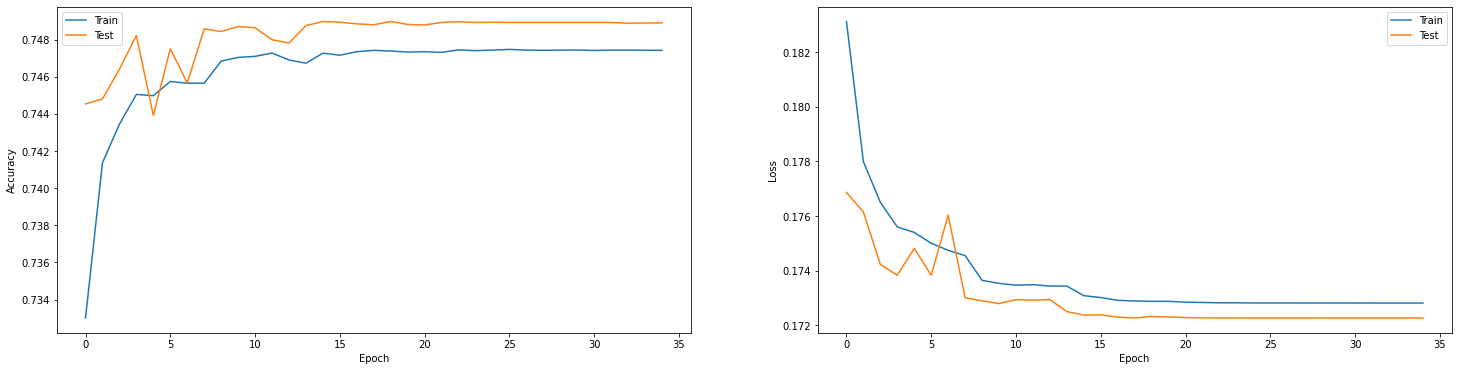

In [19]:
import matplotlib.pyplot as plt
#plot accuracy
fig, ax, = plt.subplots(1,2,figsize=(25,6))
ax[0].plot(history.history['accuracy'], label='Train')
ax[0].plot(history.history['val_accuracy'], label='Test')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
#plot loss
ax[1].plot(history.history['loss'], label='Train')
ax[1].plot(history.history['val_loss'], label='Test')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

In conclusion, we see that the loss is at a low, acceptable value of around 0.175. More importantly the accuracy is in the 70%'s. Using the fully connected neural network we have been able to train a model that has an accuracy 0.5% higher than the K Nearest Neighbors model. the growth over the KNN is not impressive but the prediction time we saved is notable. If you pay attention to the it would be safe to stop the epochs around 15. This would make sure that further epochs do not result in overfitting. We added the plateau reduction callback to try and avoid over fitting. As you can see We do not appear to be overfitting in the current state.

As previously mentioned, our data set is lacking some tell tale features that could help improve the model's accuracy. If we had those features stated above, our NN could most likely reach into the the high 80%'s for model accuracy. 

# Decision Trees

We are going to create a Decision Tree model for our final ML model. Decision trees are very similar to how NFL coaches and players read the offense. Very quickly they go through a set of questions that they always asks themselves when reading the offense. What is the offensive formation? How many wide receivers are there? How many running backs are there? What was the previous play? How much time is left on the clock? What quarter is it? How many yards until a first down? These are just some of the questions that are asked when trying to predict what the current play is going to be. Decision Trees do a great job of resembling this process, so we are going to try and take advantage of it and train one for play prediction.

We are going to create 2 quick decision tree models. One is going to be with all of the features and the other model is going to be the 5 hand-selected models we chose earlier. 

To start lets import the required libraries that we want to use for training and visualizing the tree.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

Now lets fit and visualize the first model on all the features.

In [ ]:
tree = DecisionTreeClassifier(max_depth=5,random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

I should note here that if you set the depth to 2 and increase the figure size to around 25 x 25, then you can visually see the tree nodes and what they say. The accuracy will decrease, but it gives you a general idea of what is at each node. For accuracy purposes we are going to leave it at depth 5. We are also going to leave it at size 12 x 12, so that you can get a general view of the tree structure.

All Features Tree


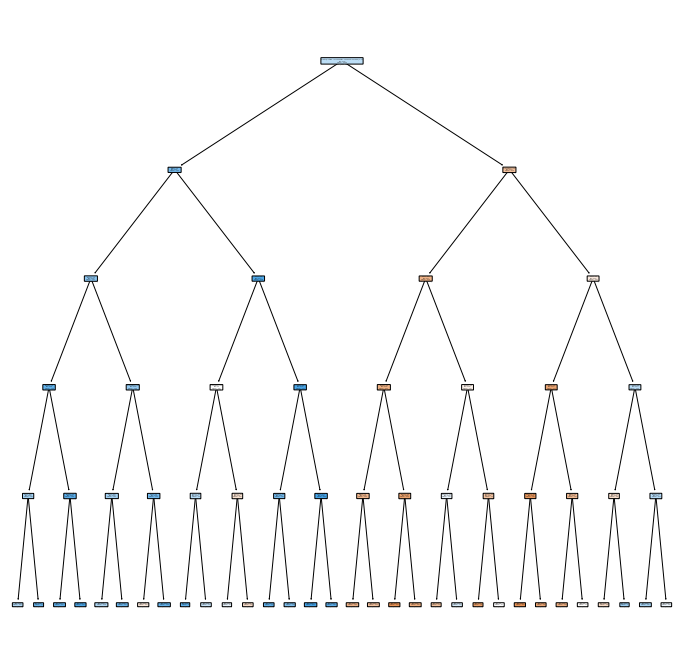

In [ ]:
plt.figure(figsize=(12,12))
plot_tree(tree, filled=True, rounded=True, feature_names=["Quarter","Minute", "Second", "Down", "ToGo", "YardLine", "SeriesFirstDown", "Formation(0=shotgun, 1=nohuddleShotgun, 2=undercenter,3=noHuddle)", "YardLineDirection(1=OPP,0=OWN)"])
print(f'All Features Tree')


Using the added features of the sklearn tree classifier, we can evaluate our decision tree model.

In [ ]:
print(f'Testing Set Accuracy is: {tree.score(X_test,y_test):2.2f}')

Testing Set Accuracy is: 0.75


We have achieved a testing accuracy of 75% which is just slightly higher than what our neural network model was getting. Now let us train another tree on the 5 hand selected features we chose.

5 Feature Tree
Testing Set Accuracy is: 0.74


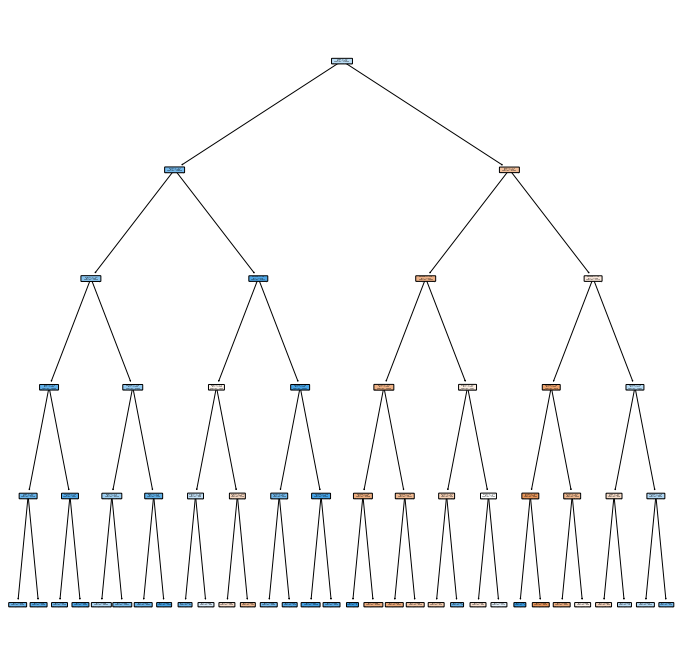

In [ ]:
tree = DecisionTreeClassifier(max_depth=5,random_state=42)
tree.fit(X2_train, y2_train)
plt.figure(figsize=(12,12))
plot_tree(tree, filled=True, rounded=True, feature_names=["Quarter","Minute", "Second", "Down", "ToGo", "YardLine", "SeriesFirstDown", "Formation(0=shotgun, 1=nohuddleShotgun, 2=undercenter,3=noHuddle)", "YardLineDirection(1=OPP,0=OWN)"])
print(f'5 Feature Tree')
print(f'Testing Set Accuracy is: {tree.score(X2_test,y2_test):2.2f}')

As we can see here our 5 feature tree is achieving the same test accuracy as our all feature tree did. This is promising because we are able to reduce the training time significantly with 5 features and the decision tree, while achieving an accuracy higher than the other models.

# Conclusions and Observations

Above we introduced you what it means to predict plays during a football game, the data set we would be using, and the limitations that our data set has. We then trained 3 different ML models to predict the outcome of football plays given pre-snap information.

  We started with a K Nearest Neighbors model. Given that our data set was not linearably separable, our KNN classifier was our baseline model for predicting play types. Our expectations for the KNN were not high, since according to the data, our pair plot did not give us a lot of great separability. Initially we were able to generate an accuracy of around 68%, given all of our data. After hand selecting features that we thought were most important to the story of the dataset, we improved the accuracy up to 74%. This had promise, but using a KNN model for real world applications was not a practical solution. In a real world application for predicting play types, we would need on demand live predictions within milliseconds. A nearest neighbors algorithm is not sufficient in this manner. It needs to generate distances for every single instance that the model was fit to. This warranted us to move to the next model we used, Neural Networks.

  We then moved on to neural networks to improve upon both our accuracy and our problem of slow prediction times. We found out from our KNN model that we had better results using the data set where we hand picked the features for our training. We used that same dataset to train our neural network. I chose mean squared error as our loss function because it gave us low loss values and generated a more consistent accuracy. I also went with the adam optimizer because from online reading it seems to be the go to, and testing it was consistent and generated slightly higher accuracies than the other optimizer options. After training the model and running evaluation metrics on it, we saw a positive jump in the accuracies compared the the KNN models. The neural network was maxing out around a promising 74%, which is part of the reason I suggested to only run for 15 epochs. The model trained quickly, but past 15 epochs the accuracy started plateau suggesting that further training would result in overfitting. I did not want to overfit our model, so I suggested a stop at 15 epochs and evaluated the model. The neural network so far had demonstrated the highest accuracy, but I was looking for a quicker way to train and just as fast way to predict outcomes. This is where I thought Decision Trees would come into play.

  The final model we trained was a Decision Tree. Decision trees closely resemble the way defensive coordinators and players think; asking a bunch of questions to generate an outcome. We created 2 decision trees, one with the entire data set and another with the hand picked features. Both trees trained quickly and had just slightly higher accuracies than the neural network. We managed to get a 3 model high of 75% accuracy across the testing data. This is promising, since our data is not super descriptive of what the play should be and we are acheiving fast results with 75% accuracy. With improvements to our data set the decision tree would indeed score higher. After evaluation of all the models I would deem the decision tree as the most appropriate for our data and task at hand. It resembles the way people think about what the next play is going to be, and it is quickly trained with quick, live, on demand precitions.

# Where Do We Go From Here?

Where do we go? This problem of predicting football plays has several possible real world applications. It could be used in sports betting in vegas; the model could predict the next play and be used to set bet payouts. Another application could be used directly in the NFL. Coaches could use this model in full form to help them evaluate the offensive play type and then call plays or audibles to correctly counter the offensive strategy.

As stated several times through out the notebook, our dataset is lacking some features that potentially could be extremely beneficial to our models. They have the possibility of increasing our accuracies into the 80's and reaching close to the 90% range. I would suggest that the dataset itself is approved upon and have models retrained to see the outcome of new features. I would focus on new features, such as the ones listed at the beginning of the notebook in the limitations section. 

If the new data set is able to generate accuracies in the high 80%'s, then you could move onto on demand data collection. You could train models to read live videos of the offense and detect how many widerecievers, runningbacks, tightends, etc... are on the field and then use that models output as input into the model that will predict the play type. 